In [41]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

import sys
sys.path.append("../")
from src import soporte_eda_y_outliers as s_eda, soporte_encoding as s_encoding, soporte_scaling as s_scaling, soporte_logistica_preprocesamiento as sl, soporte_ajuste_logistica as sal

pd.set_option('display.max_columns', None)
import xgboost as xgb


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
df = pd.read_pickle("../datos_dfs/pickle1_stand.pkl")

In [43]:
df

,Attrition,Gender_Female,JobInvolvement_stand,PerformanceRating_stand,BusinessTravel_stand,Department_stand,DistanceFromHome_stand,Education_stand,EducationField_stand,JobLevel_stand,MaritalStatus_stand,MonthlyIncome_stand,StockOptionLevel_stand,TrainingTimesLastYear_stand,YearsWithCurrManager_stand,EnvironmentSatisfaction_iterative_stand,JobSatisfaction_iterative_stand,WorkLifeBalance_iterative_stand,NumCompaniesWorked_iterative_stand,TotalWorkingYears_iterative_stand,Gender_Male_stand,JobRole_Healthcare Representative_stand,JobRole_Human Resources_stand,JobRole_Laboratory Technician_stand,JobRole_Manager_stand,JobRole_Manufacturing Director_stand,JobRole_Research Director_stand,JobRole_Research Scientist_stand,JobRole_Sales Executive_stand,JobRole_Sales Representative_stand
0,0,1.0,0.380345,-0.423867,-0.265550,-0.369838,-0.389893,-0.887828,0.177295,-0.954482,-0.606304,1.414830,-0.936349,2.496714,-1.145828,0.258564,1.150724,-1.091659,-0.680433,-1.324097,-1.240092,3.178163,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444
1,1,1.0,-1.023657,2.359228,1.878002,-0.134212,0.102923,-1.864946,0.177295,-0.954482,1.460527,-0.487121,0.240187,0.156234,-0.028953,0.258564,-0.677872,1.768154,-1.081468,-0.677797,-1.240092,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,2.018826,-0.531627,-0.244444
2,0,0.0,0.380345,-0.423867,1.878002,-0.134212,0.965350,1.066407,-1.503802,1.767821,-0.606304,2.738334,2.593259,-0.623926,-0.308172,-0.662833,-0.677872,-2.521566,-0.680433,-0.807057,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444
3,0,0.0,-1.023657,-0.423867,-1.665016,-0.134212,-0.882709,2.043524,0.177295,0.860387,-0.606304,0.393226,2.593259,1.716554,0.250265,1.179962,1.150724,0.338248,0.121636,0.227022,0.806392,-0.314647,5.354725,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444
4,0,0.0,0.380345,-0.423867,-0.265550,-0.134212,0.102923,-1.864946,0.211928,-0.954482,1.460527,-0.880636,1.416723,-0.623926,-0.028953,1.179962,-1.592171,0.338248,0.522671,-0.290018,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,0,1.0,0.380345,-0.423867,-0.265550,-0.134212,-1.005913,-0.887828,0.211928,-0.954482,-0.826933,0.129463,0.240187,1.716554,-1.145828,-0.662833,0.236426,0.338248,-0.279399,1.778140,-1.240092,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444
1539,0,0.0,0.380345,-0.423867,-0.265550,-0.134212,-0.882709,0.089289,0.177295,-0.047048,-0.606304,-0.459211,-0.936349,-0.623926,-1.145828,-0.662833,1.150724,0.338248,-0.279399,-0.807057,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,4.090921
1540,0,0.0,0.380345,-0.423867,-0.265550,-0.369838,-1.005913,1.066407,-1.666218,-0.954482,-0.826933,-0.829928,2.593259,0.156234,3.042453,-0.662833,-0.677872,0.338248,2.126809,1.131840,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,2.018826,-0.531627,-0.244444
1541,0,0.0,-1.023657,-0.423867,-0.265550,-0.134212,-0.882709,0.089289,0.177295,-0.954482,-0.826933,-0.800527,0.240187,0.936394,0.808703,-1.584230,1.150724,0.338248,-0.279399,-0.290018,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,2.992464,-0.239945,-0.495337,-0.531627,-0.244444


In [44]:
lista_categoricas = ['BusinessTravel_stand', 
                     'Department_stand', 
                     'EducationField_stand', 
                     'Gender_Male_stand',
                     "Gender_Female",
                     'JobRole_Healthcare Representative_stand',
                     'JobRole_Human Resources_stand',
                     'JobRole_Laboratory Technician_stand', 
                     'JobRole_Manager_stand',
                     'JobRole_Manufacturing Director_stand', 
                     'JobRole_Research Director_stand',
                     'JobRole_Research Scientist_stand', 
                     'JobRole_Sales Executive_stand',
                     'JobRole_Sales Representative_stand',
                     'MaritalStatus_stand']

En primer lugar, encontramos datos muy desbalanceados. Utilizaremos un SMOTENC-TOMEK

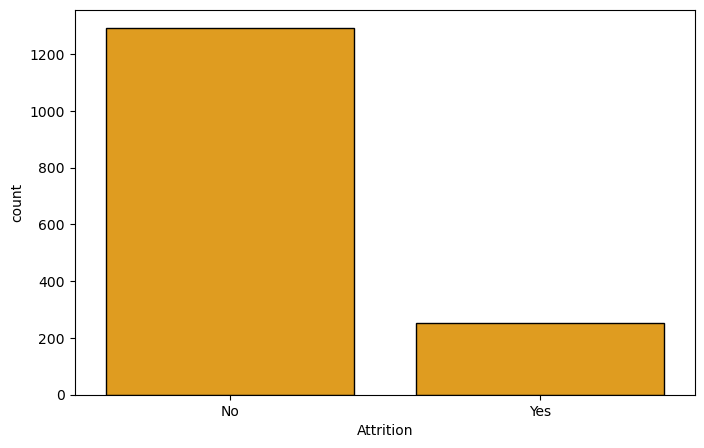

In [45]:
X = df.drop(columns=["Attrition"])  
y = df["Attrition"]  

desbalanceo = sl.Desbalanceo(dataframe = df, variable_dependiente = y)
desbalanceo.visualizar_clase()

In [46]:
df["Attrition"].unique()

array([0, 1], dtype=int64)

In [47]:
# Aplicar SMOTENC para generar muestras sintéticas
smotenc = SMOTENC(categorical_features=lista_categoricas, random_state=42)
X_res, y_res = smotenc.fit_resample(X, y)

# Aplicar Tomek Links para eliminar instancias ruidosas
tomek = TomekLinks()
X_res_tomek, y_res_tomek = tomek.fit_resample(X_res, y_res)


df_balanced = pd.concat([X_res, y_res], axis= 1)

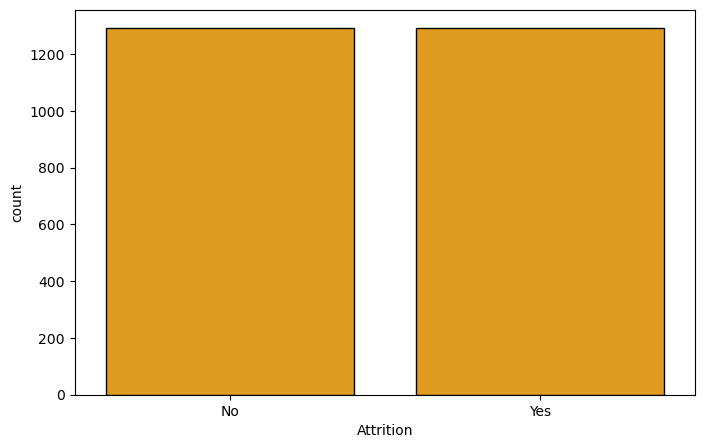

In [48]:
desbalanceo = sl.Desbalanceo(dataframe = df_balanced, variable_dependiente = y_res)
desbalanceo.visualizar_clase()

In [49]:
df_balanced

,Gender_Female,JobInvolvement_stand,PerformanceRating_stand,BusinessTravel_stand,Department_stand,DistanceFromHome_stand,Education_stand,EducationField_stand,JobLevel_stand,MaritalStatus_stand,MonthlyIncome_stand,StockOptionLevel_stand,TrainingTimesLastYear_stand,YearsWithCurrManager_stand,EnvironmentSatisfaction_iterative_stand,JobSatisfaction_iterative_stand,WorkLifeBalance_iterative_stand,NumCompaniesWorked_iterative_stand,TotalWorkingYears_iterative_stand,Gender_Male_stand,JobRole_Healthcare Representative_stand,JobRole_Human Resources_stand,JobRole_Laboratory Technician_stand,JobRole_Manager_stand,JobRole_Manufacturing Director_stand,JobRole_Research Director_stand,JobRole_Research Scientist_stand,JobRole_Sales Executive_stand,JobRole_Sales Representative_stand,Attrition
0,1.0,0.380345,-0.423867,-0.265550,-0.369838,-0.389893,-0.887828,0.177295,-0.954482,-0.606304,1.414830,-0.936349,2.496714,-1.145828,0.258564,1.150724,-1.091659,-0.680433,-1.324097,-1.240092,3.178163,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,0
1,1.0,-1.023657,2.359228,1.878002,-0.134212,0.102923,-1.864946,0.177295,-0.954482,1.460527,-0.487121,0.240187,0.156234,-0.028953,0.258564,-0.677872,1.768154,-1.081468,-0.677797,-1.240092,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,2.018826,-0.531627,-0.244444,1
2,0.0,0.380345,-0.423867,1.878002,-0.134212,0.965350,1.066407,-1.503802,1.767821,-0.606304,2.738334,2.593259,-0.623926,-0.308172,-0.662833,-0.677872,-2.521566,-0.680433,-0.807057,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444,0
3,0.0,-1.023657,-0.423867,-1.665016,-0.134212,-0.882709,2.043524,0.177295,0.860387,-0.606304,0.393226,2.593259,1.716554,0.250265,1.179962,1.150724,0.338248,0.121636,0.227022,0.806392,-0.314647,5.354725,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,0
4,0.0,0.380345,-0.423867,-0.265550,-0.134212,0.102923,-1.864946,0.211928,-0.954482,1.460527,-0.880636,1.416723,-0.623926,-0.028953,1.179962,-1.592171,0.338248,0.522671,-0.290018,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,0.0,0.380345,-0.423867,1.878002,-0.134212,-0.047353,0.089289,0.177295,-0.047048,1.460527,-0.237190,2.593259,0.156234,0.335409,0.258564,-1.194471,0.338248,-0.907027,-0.379862,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,1
2580,0.0,-1.460462,2.359228,-0.265550,-0.134212,-0.157179,0.762411,-0.051434,-0.672166,1.460527,-0.170860,-0.936349,-0.381207,-0.376430,0.258564,1.150724,-2.521566,0.424634,-0.700780,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,1.881020,-0.244444,1
2581,0.0,0.380345,-0.423867,-0.265550,-0.134212,-0.959091,1.066407,0.177295,2.675256,1.460527,0.649031,-0.936349,-0.525097,-0.202060,0.025125,0.236426,0.338248,0.720498,-0.628675,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,1
2582,0.0,0.380345,2.359228,-0.265550,-0.134212,-0.524226,1.066407,0.177295,0.530345,-0.606304,-0.773361,-0.508433,-0.340175,0.910257,0.007408,0.236426,-1.611729,1.106110,0.191788,0.806392,-0.314647,-0.186751,-0.465701,-0.27297,-0.334173,-0.239945,-0.495337,-0.531627,-0.244444,1


In [50]:
ajuste = sal.AnalisisModelosClasificacion(df_balanced, "Attrition")

In [51]:
ajuste.ajustar_modelo("logistic_regression")

Hemos ajustado el modelo, vemos que tenemos métricas bastante buenas. No hay overfitting tampoco

In [52]:
df_resultados = ajuste.calcular_metricas(modelo_nombre =  "logistic_regression" )

df_resultados["modelo"] = "regresion logistica"
df_resultados

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.832608,0.835918,0.832608,0.832219,0.665293,0.911671,0.000512,NaN,NaN,NaN,regresion logistica
test,0.835590,0.837693,0.835590,0.835253,0.670891,0.905068,NaN,NaN,0.000512,NaN,regresion logistica


El modelo ha sido batante preciso

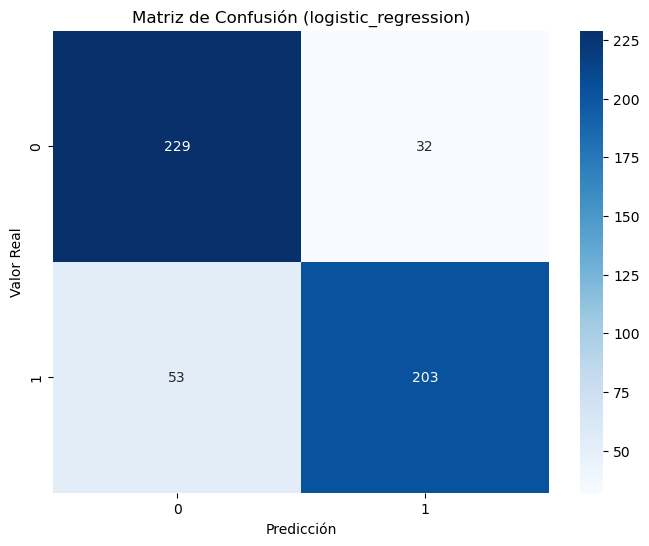

In [53]:
ajuste.plot_matriz_confusion("logistic_regression")

Todas las variables son significativas para el modelo

,Feature,Importance
9,MaritalStatus_stand,0.567214
7,EducationField_stand,0.307622
3,BusinessTravel_stand,0.227168
4,Department_stand,0.218780
17,NumCompaniesWorked_iterative_stand,0.118546
8,JobLevel_stand,-0.085158
6,Education_stand,-0.086981
5,DistanceFromHome_stand,-0.099318
2,PerformanceRating_stand,-0.116104
19,Gender_Male_stand,-0.134461


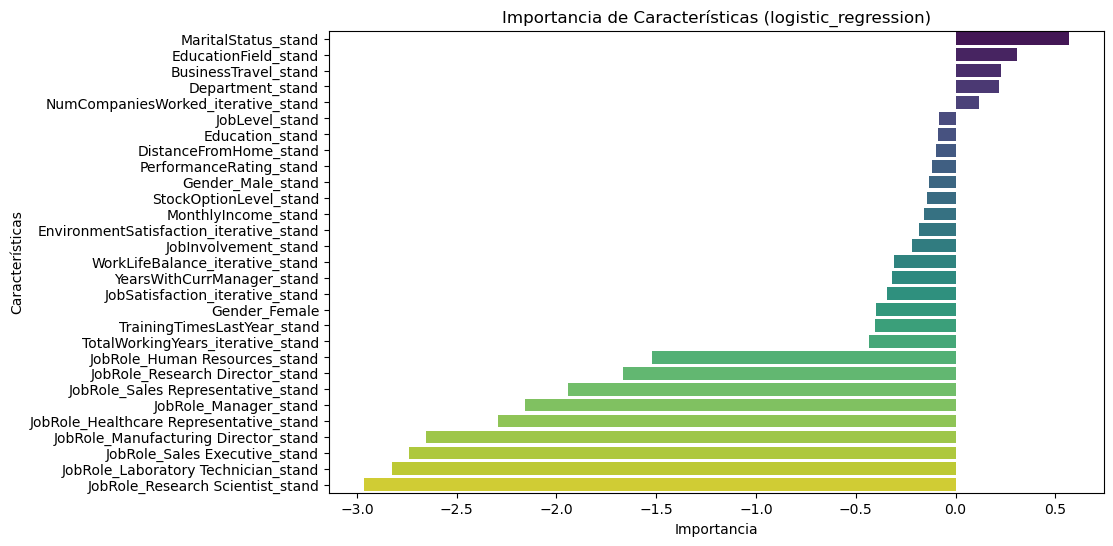

In [54]:
ajuste.importancia_predictores("logistic_regression")

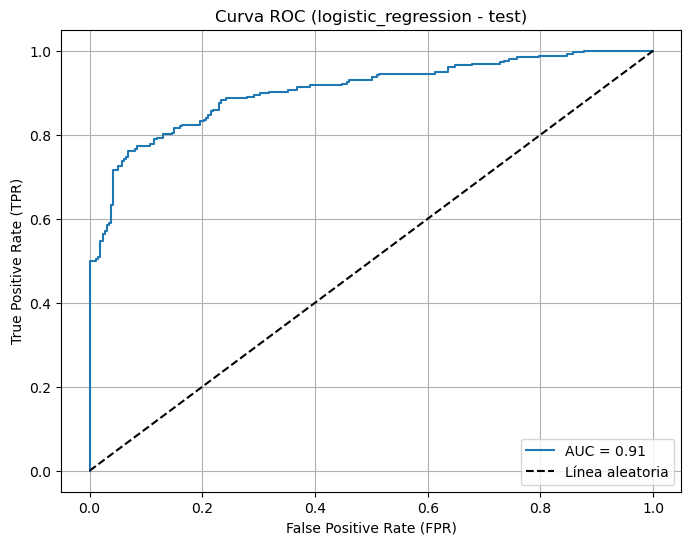

(array([0.        , 0.        , 0.        , 0.01149425, 0.01149425,
        0.01532567, 0.01532567, 0.01915709, 0.01915709, 0.02298851,
        0.02298851, 0.02681992, 0.02681992, 0.03065134, 0.03065134,
        0.03448276, 0.03448276, 0.03831418, 0.03831418, 0.04214559,
        0.04214559, 0.04980843, 0.04980843, 0.05747126, 0.05747126,
        0.06130268, 0.06130268, 0.0651341 , 0.0651341 , 0.06896552,
        0.06896552, 0.08045977, 0.08045977, 0.08429119, 0.08429119,
        0.10727969, 0.10727969, 0.11494253, 0.11494253, 0.11877395,
        0.11877395, 0.1302682 , 0.1302682 , 0.14559387, 0.14559387,
        0.14942529, 0.14942529, 0.16091954, 0.16091954, 0.16475096,
        0.16475096, 0.1954023 , 0.1954023 , 0.20306513, 0.20306513,
        0.20689655, 0.20689655, 0.21072797, 0.21072797, 0.21455939,
        0.21455939, 0.2183908 , 0.2183908 , 0.22988506, 0.22988506,
        0.23371648, 0.23371648, 0.24137931, 0.24137931, 0.27969349,
        0.27969349, 0.29118774, 0.29118774, 0.30

In [55]:
ajuste.calcular_graficar_roc("logistic_regression")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.916788,0.917855,0.916788,0.916740,0.833595,0.979747,0.00683,16.0,NaN,NaN
test,0.765957,0.766344,0.765957,0.765803,0.531678,0.819482,NaN,NaN,0.00683,16.0


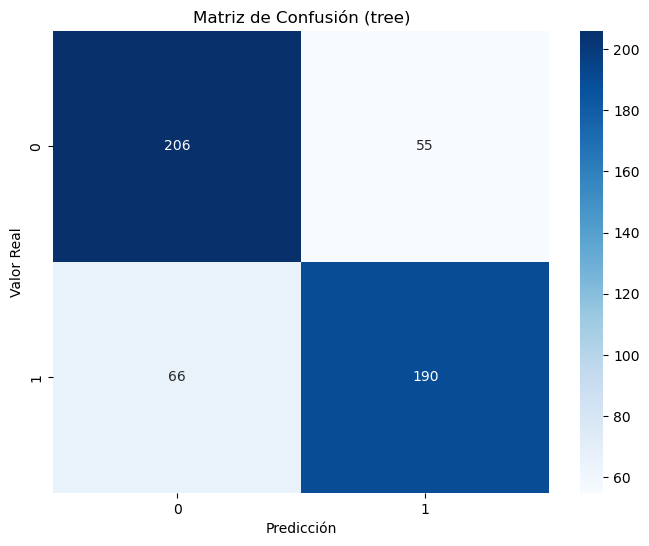

,Feature,Importance
18,TotalWorkingYears_iterative_stand,0.160628
9,MaritalStatus_stand,0.125387
12,TrainingTimesLastYear_stand,0.101155
15,JobSatisfaction_iterative_stand,0.068016
14,EnvironmentSatisfaction_iterative_stand,0.059671
1,JobInvolvement_stand,0.054615
8,JobLevel_stand,0.054471
13,YearsWithCurrManager_stand,0.047855
10,MonthlyIncome_stand,0.043804
16,WorkLifeBalance_iterative_stand,0.040467


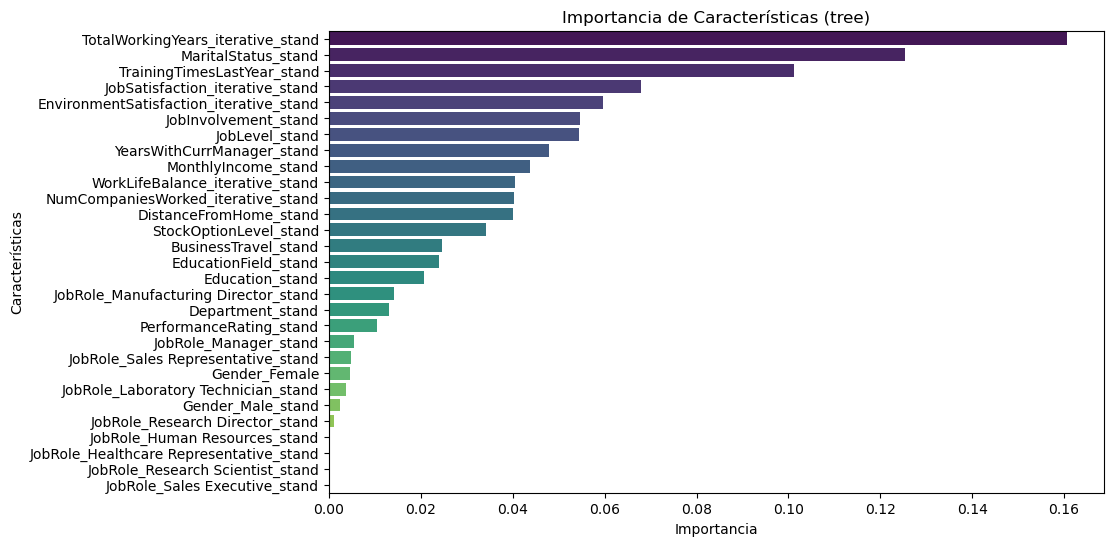

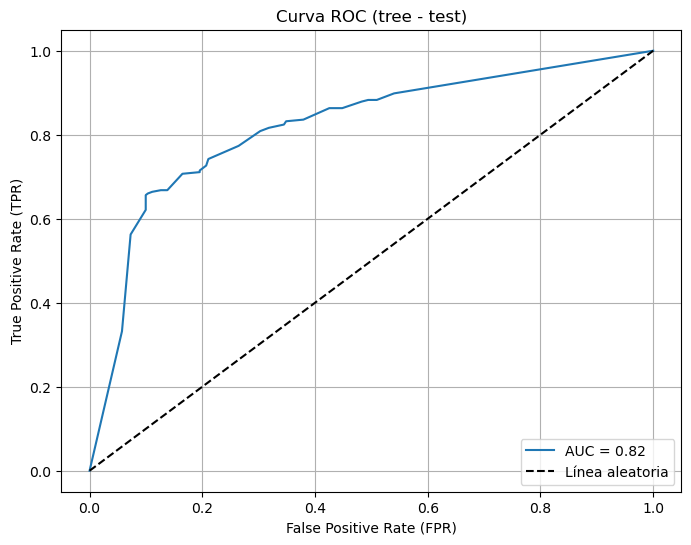

In [56]:
ajuste.ajustar_modelo("tree")
df_resultados_tree = ajuste.calcular_metricas(modelo_nombre =  "tree" )
display (df_resultados_tree.head())
ajuste.plot_matriz_confusion("tree")
ajuste.importancia_predictores("tree")
ajuste.calcular_graficar_roc("tree")
df_resultados_tree["modelo"] = "tree"

df_resultados_final = pd.concat([df_resultados, df_resultados_tree], axis = 0)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.058919,NaN,NaN,NaN
test,0.895551,0.900147,0.895551,0.895189,0.790864,0.957877,NaN,NaN,0.058919,NaN


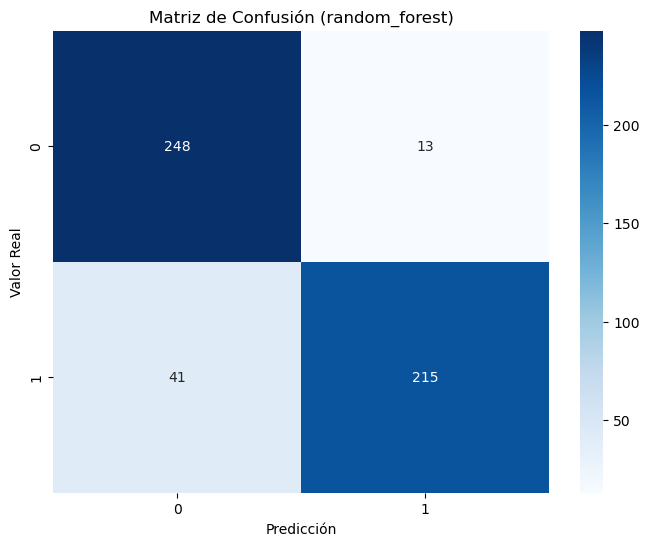

,Feature,Importance
18,TotalWorkingYears_iterative_stand,0.106573
13,YearsWithCurrManager_stand,0.090886
9,MaritalStatus_stand,0.066347
14,EnvironmentSatisfaction_iterative_stand,0.063030
15,JobSatisfaction_iterative_stand,0.059437
8,JobLevel_stand,0.055973
5,DistanceFromHome_stand,0.055152
17,NumCompaniesWorked_iterative_stand,0.054396
12,TrainingTimesLastYear_stand,0.054359
10,MonthlyIncome_stand,0.053109


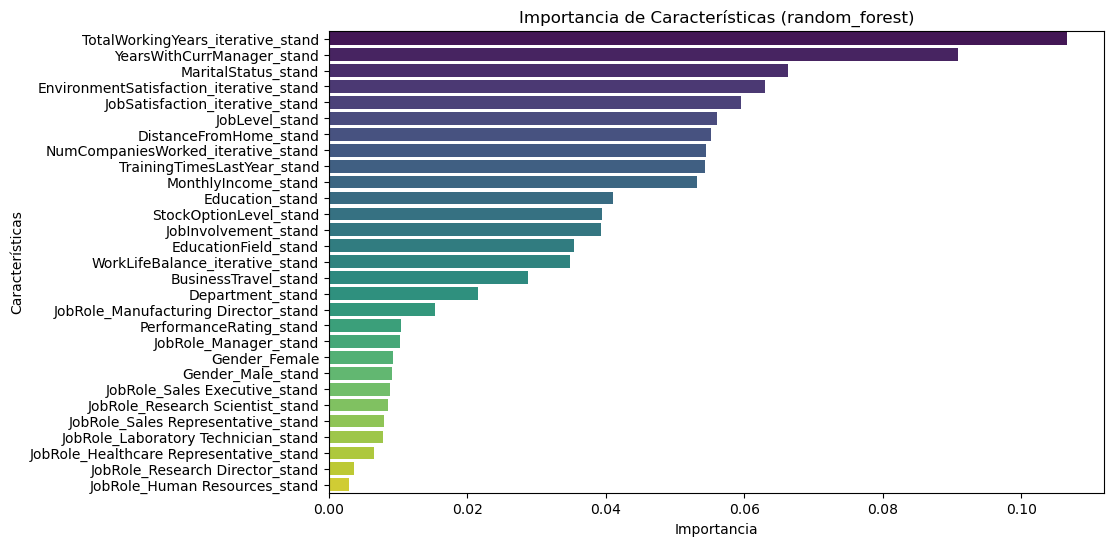

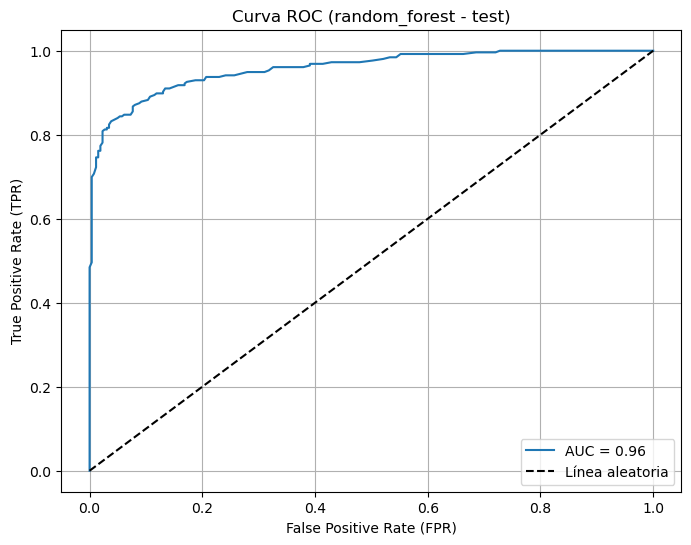

In [57]:
ajuste.ajustar_modelo("random_forest")
df_resultados_forest = ajuste.calcular_metricas(modelo_nombre =  "random_forest" )
display (df_resultados_forest.head())
ajuste.plot_matriz_confusion("random_forest")
ajuste.importancia_predictores("random_forest")
ajuste.calcular_graficar_roc("random_forest")
df_resultados_forest["modelo"] = "Random forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)

In [ ]:
param_grid = 

In [ ]:
ajuste = sal.AnalisisModelosClasificacion(df_balanced, "Attrition")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.966618,0.967761,0.966618,0.966600,0.933244,0.996699,0.015626,NaN,NaN,NaN
test,0.901354,0.905689,0.901354,0.901034,0.802490,0.949009,NaN,NaN,0.015626,NaN


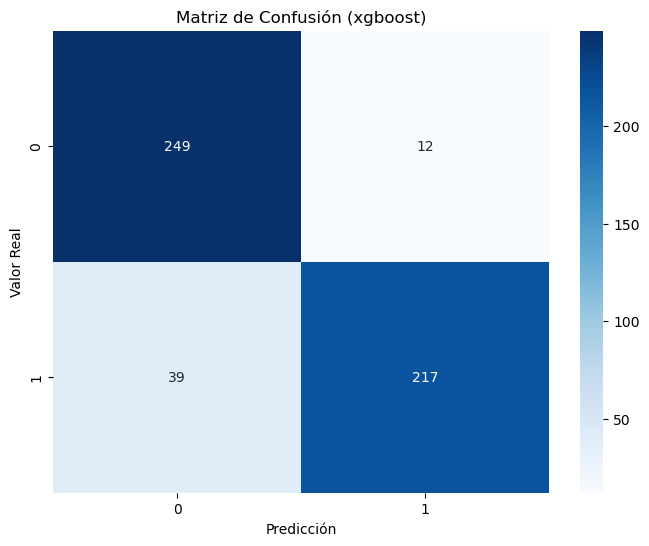

,Feature,Importance
9,MaritalStatus_stand,0.070023
15,JobSatisfaction_iterative_stand,0.068476
14,EnvironmentSatisfaction_iterative_stand,0.062214
24,JobRole_Manufacturing Director_stand,0.053116
12,TrainingTimesLastYear_stand,0.051468
18,TotalWorkingYears_iterative_stand,0.050344
8,JobLevel_stand,0.049704
3,BusinessTravel_stand,0.047917
13,YearsWithCurrManager_stand,0.046485
23,JobRole_Manager_stand,0.041319


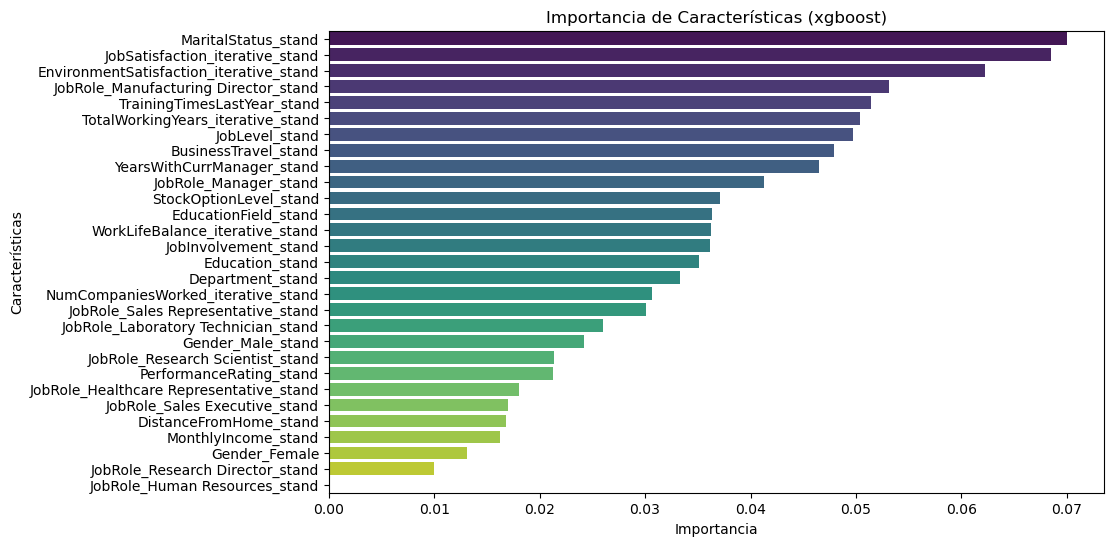

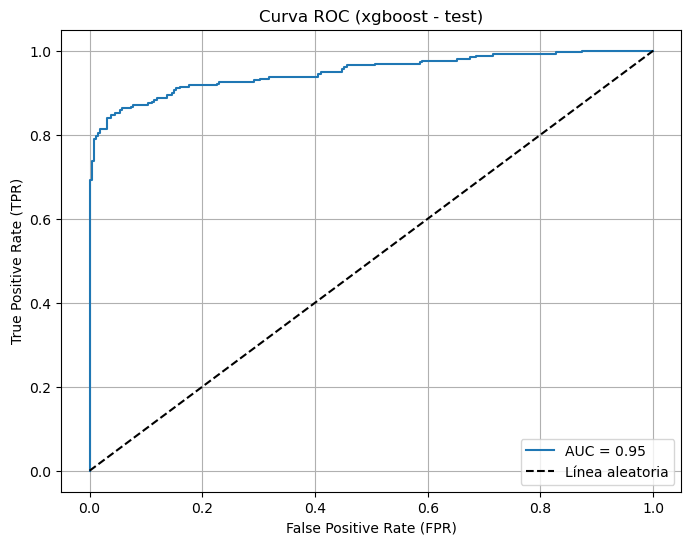

In [58]:
ajuste.ajustar_modelo("xgboost")
df_resultados_xgboost = ajuste.calcular_metricas(modelo_nombre =  "xgboost" )
display (df_resultados_xgboost.head())
ajuste.plot_matriz_confusion("xgboost")
ajuste.importancia_predictores("xgboost")
ajuste.calcular_graficar_roc("xgboost")

df_resultados_xgboost["modelo"] = "xgboost"

df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.015627,16.0,NaN,NaN
test,0.889749,0.892255,0.889749,0.889523,0.779303,0.952242,NaN,NaN,0.015627,16.0


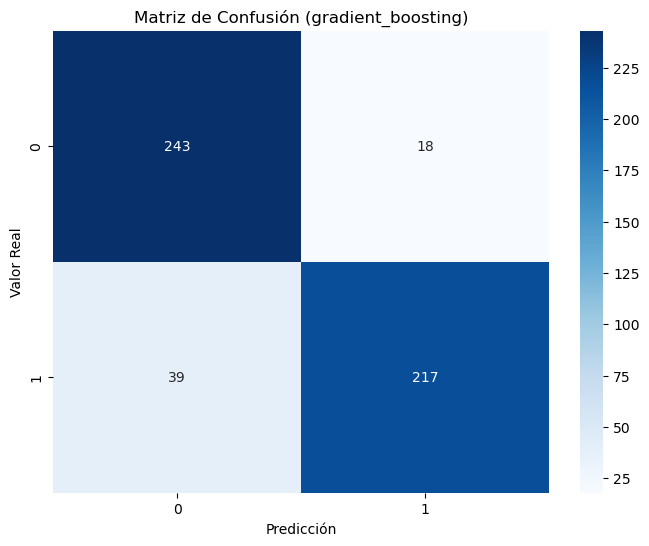

,Feature,Importance
18,TotalWorkingYears_iterative_stand,0.126290
8,JobLevel_stand,0.096592
13,YearsWithCurrManager_stand,0.086695
14,EnvironmentSatisfaction_iterative_stand,0.084997
9,MaritalStatus_stand,0.075941
12,TrainingTimesLastYear_stand,0.068967
15,JobSatisfaction_iterative_stand,0.066263
10,MonthlyIncome_stand,0.052416
16,WorkLifeBalance_iterative_stand,0.050488
17,NumCompaniesWorked_iterative_stand,0.048961


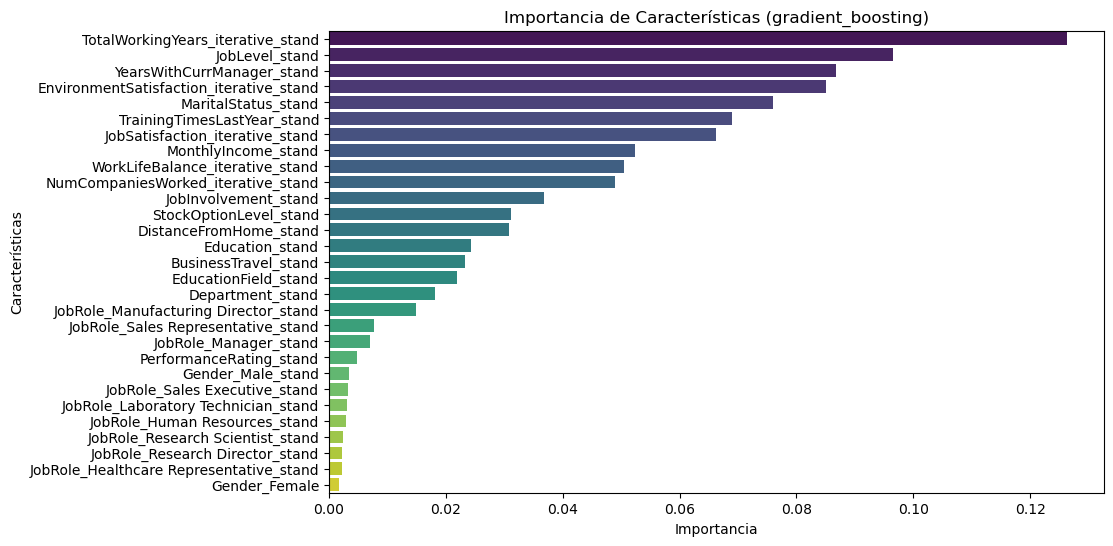

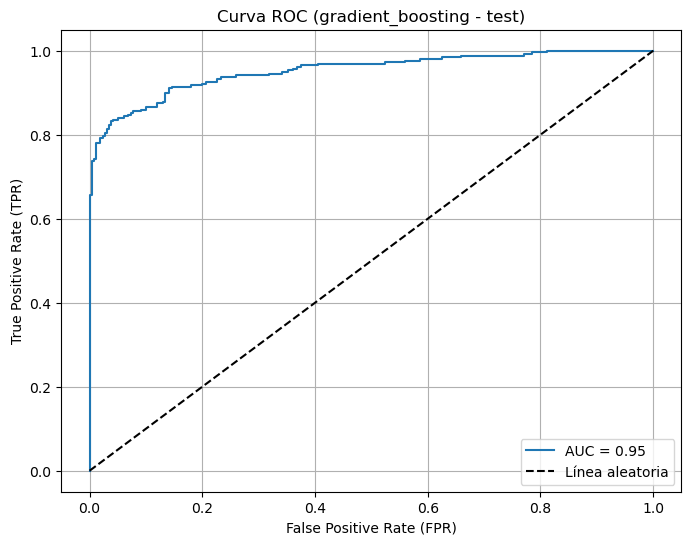

In [59]:
ajuste.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = ajuste.calcular_metricas(modelo_nombre =  "gradient_boosting" )
display (df_resultados_gradient_boosting.head())
ajuste.plot_matriz_confusion("gradient_boosting")
ajuste.importancia_predictores("gradient_boosting")
ajuste.calcular_graficar_roc("gradient_boosting")
df_resultados_gradient_boosting["modelo"] = "gradient_boosting"

df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient_boosting], axis = 0)

In [65]:
# Función para asignar colores
def color_filas_por_modelo(row):
    if row["modelo"] == "tree":
        return ["background-color: #e6b3e0; color: black"] * len(row)  
    
    elif row["modelo"] == "Random forest":
        return ["background-color: #c2f0c2; color: black"] * len(row) 

    elif row["modelo"] == "gradient_boosting":
        return ["background-color: #ffd9b3; color: black"] * len(row)  

    elif row["modelo"] == "xgboost":
        return ["background-color: #f7b3c2; color: black"] * len(row)  

    elif row["modelo"] == "regresion logistica":
        return ["background-color: #b3d1ff; color: black"] * len(row)  
    
    # Caso por defecto
    return ["color: black"] * len(row)


In [ ]:
df_resultados_final = df_resultados_final.reset_index()
df_resultados_final = df_resultados_final.drop(columns = ["time_seconds","n_jobs","tiempo_computacion(segundos)","nucleos_usados"])
df_styled = df_resultados_final.style.apply(color_filas_por_modelo, axis=1)

In [82]:
df_styled 

,level_0,index,accuracy,precision,recall,f1,kappa,auc,modelo
0,0,train,0.832608,0.835918,0.832608,0.832219,0.665293,0.911671,regresion logistica
1,1,test,0.835590,0.837693,0.835590,0.835253,0.670891,0.905068,regresion logistica
2,2,train,0.916788,0.917855,0.916788,0.916740,0.833595,0.979747,tree
3,3,test,0.765957,0.766344,0.765957,0.765803,0.531678,0.819482,tree
4,4,train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Random forest
5,5,test,0.895551,0.900147,0.895551,0.895189,0.790864,0.957877,Random forest
6,6,train,0.966618,0.967761,0.966618,0.966600,0.933244,0.996699,xgboost
7,7,test,0.901354,0.905689,0.901354,0.901034,0.802490,0.949009,xgboost
8,8,train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient_boosting
9,9,test,0.889749,0.892255,0.889749,0.889523,0.779303,0.952242,gradient_boosting
